<a href="https://colab.research.google.com/github/HAN-GEONHUI/test/blob/t_academy_%EC%88%98%EC%97%85/17_%EB%AF%B8%EB%A1%9C%ED%83%90%EC%83%89%EB%AC%B8%EC%A0%9C(240816).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 문제 경로 : https://www.acmicpc.net/problem/2178
# 미로 탐색 문제

In [ ]:
# 기본적인DFS/BFS --> k거리도시문제 --> 미로 탐색 문제!!!

In [ ]:
# 문제 : 미로 탐색 문제
#        + 앞에서 했던 구현에서 평면상에서 LRUD에 대한 움직임!!!!
#        + 다 해보기에 : 탐색에 대한 기본 내용!!
#        + 제일 짧은 거리 : 최소 거리 문제 고민!!!!
# ===> 판대기 : 지도가 아니라 2D 평면 미로판!!!!!
#      할 일 // 한 일 세팅을 어찌할지에 대한 고민!!!!!

In [ ]:
#분석 : 2차원 평면상의 움직임 +모든 경우에 수 +최단거리
#----> 2차원 평면상의 움직임 : LRUD구현에서 했던 방식(in //out:부등식을 사용하면 용이)
#-->탐색: 기존에 한 일에 대한 세팅: 도시 최단거리 문제 스타일+주어진 2차원에서 처리,기존 지도에 갱신
# DFS(X):갔다가 오는 것은 번거로운 일
# BFS(O):순차적으로 출발점을 기준으로 한 걸음 씩 진행,자료 처리 방식 queue사용 ==> deque 사용하자 !!!

In [ ]:
#입력처리1) 지도크기(가로,세로)
n,m =map(int, input("가로 세로 크기를 입력하세요..").split(" "))
print(n,m)

가로 세로 크기를 입력하세요..4 6
4 6


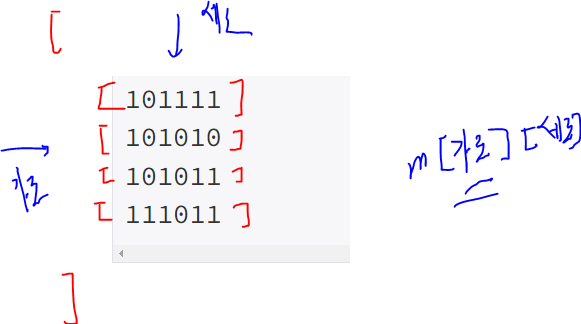

In [ ]:
"1 0 1 1 1 1".split(" ")

['1', '0', '1', '1', '1', '1']

In [ ]:
3# 입력처리2) 지도의 실제 값을 받는 부분
#            ==> 큰 틀 : 가로 줄!!!!
graph = []
for i in range(n):
    t = input("n m에 대한 {0}번째 가로줄".format(i+1) )
    t = list(map(int, [ i for i in t]))
    graph.append( t )
graph

n m에 대한 1번째 가로줄11011
n m에 대한 2번째 가로줄10011
n m에 대한 3번째 가로줄11001
n m에 대한 4번째 가로줄10101


[[1, 1, 0, 1, 1], [1, 0, 0, 1, 1], [1, 1, 0, 0, 1], [1, 0, 1, 0, 1]]

In [ ]:
a = input("n m에 대한 {0}번째 가로줄".format(i+1))
a

n m에 대한 4번째 가로줄10111


'10111'

In [ ]:
list(map(int, [ i for i in a]))

[1, 0, 1, 1, 1]

In [ ]:
#구현에서 LRUD 이동 문제+ k 도시 문제를 섞은 케이스

In [ ]:
#--> 코테 문제들은 처음에 너무 오래 생각할 필요는 없음
#    빠르게 보고, 이해하고, 놓친거 체크
#     *** 안 보고 손이 나갈정도로 숙지할

In [ ]:
# 실제 탐색에 대한 구현!!!
# ==> 2차원에 LRUD에 대한 움직임!!!! ==> 지도를 접근하는 좌표
# ==> 1칸씩 움직인다고 했음... LRUD
#     dict//dx,dy list//etc
# --> 선생님의 주관적인 생각) 굳이 L,R,U.D 지시사항은 필욭
#                             L자 이동 문제 처럼 단순히 이동해봐야할 4가지만 리스트 업 해보면 됨
dx = [-1,1,0,0]
dy = [0,0,-1,1]
#--> LRUD 대한 순서는 고민을 안해도 됨
# 그냥 4 가지 중에서 할  수 있는 것들만 하면 된다.

#이 문제는 탐색 중에서 출발점 중심으로 체계적/한 단계씩 진전을 해야함
# ==> BFS방식!!!!
# ==> Queue 스케줄!!
#deque 패키지를 사용
from collections import deque

In [ ]:
#최단 거리 미로 탐색 함수
#입력 : 출발점(좌표화)
#출력 : 따로 없음
#할일 : 사용자가 입력으로 준 지도에 직접 갱신
#      --> 개인 스타일에 맞춰서 수정하거나 조정하면 됨
#처음 출발 위치: 문제상(1,1)--> 지도를 파이썬의 리스트로 코드화를 했기에 파이썬의(0,0)

def bfs_miro( start):  # (0,0)
    # 기본 세팅
    # 1-1) 할 일 : q --> queue(큐) [ (x_pos, y_pos),,,,,]
    # 1-2) 한 일 : 거리 --> graph에 직접 기록하면 됨!!!!
    x_pos = start[0]
    y_pos = start[1]
    # To Do list
    q = deque()

    # 2) 초기값에 대한 세팅 : 출발점에 대한 세팅!!!
    q.append( (x_pos, y_pos))
    # ==> 입력으로 준 start 위치에 대한 좌표  정보를 할 일에 추가하고 시작!!!

    # 3) 큰 틀 : 할 일이 없을 떄 까지....
    while q:
        # 내가 방문할 곳 선택 : bfs --> queue --> 맨앞
        #                       2차원의 위치 2개의 x,y좌표로
        now_x, now_y = q.popleft() # BFS --> ( x_pos, y_pos) -->파이썬 멀티할당
        # why? LRUD를 기본적으로 x,y 독립적으로 돌리면 되어서!!
        # 지금 now에서 할 일 : LRUD 이동해본다면,,,, 4가지로 Fix
        for i in range(4): # 4가지 LRUD
            next_x = now_x + dx[i]
            next_y = now_y + dy[i]
            # now===> LURD 1칸 이동해본다면은.....next
            # 체크1) in.out 체크
            if 0<= next_x<n and 0<= next_y<m: # 파이썬 기준 인덱스 중심.in
                # 지도 안 쪽으로 이동이 가능한 LRUD 경우들만
                # 체크2) 내가 온 곳이 처음 방문한 곳인지!!!!
                if graph[next_x][next_y] == 1:
                    # 값을 갱신!!!!! 지금 값 + 1 도장찍기!!!
                    graph[next_x][next_y] =  graph[now_x][now_y] + 1
                    # 거기서 또 할 일을 받아야 함 : LRUD 더 이동해봐!!!
                    q.append( (next_x, next_y))


In [ ]:
bfs_miro( (0,0))

In [ ]:
graph

[[3, 0, 9, 10, 11, 12],
 [2, 0, 8, 0, 12, 0],
 [3, 0, 7, 0, 13, 14],
 [4, 5, 6, 0, 14, 15]]

In [ ]:
graph[n-1][m-1]

15

In [ ]:
# 정리
# --> 기본적인 탐색 : DFS vs BFS
# --> 기본이 되는 문제들 : 2차 평면상의 움직 지도 문제 + k도시 탐색(최단거리)
# ==> 판대기를 2차원 평면!!!! : 판대기가 다양하게 세팅이 될 수 있구나!!!
#                               ( 지도는 한 종류 중 하나임!! )
# ==> 판대기에 맞춰서 할 일에 대한 세팅!! ( 여기서는 좌표 )
#                     한 일에 대한 세팅!! (따로 기록, 판대기에 직접 기록 )
#                                         case by case
# ** 어려운 문제들은 잘 보일 수 있음!!!!!!!
# ===> 여러 유형을 풀고// 스스로 유형별 정리 // 본인만의 기준!!!!

In [ ]:
from collections import deque
dx = [-1,1,0,0]
dy = [0,0,-1,1]

